# 도표 17-27. 단일지수평활법 하이퍼파라미터 조정

In [3]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the provided Excel file
file_path = '/content/sample_data/시계열분석_복합SCFI_2017.xlsx'
data = pd.read_excel(file_path)

# Convert YYYYMM to datetime and set as index
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')
data.set_index('YYYYMM', inplace=True)

# Split the data into train and test sets
train_data = data[:-6]
test_data = data[-6:]

# Initialize variables to store the results
alpha_values = np.arange(0, 1.1, 0.1)  # Alpha values from 0 to 1 in increments of 0.1
test_rmse = []  # To store test RMSE values

# Applying Single Exponential Smoothing and calculating RMSE
for alpha in alpha_values:
    model = SimpleExpSmoothing(train_data).fit(smoothing_level=alpha, optimized=False)
    test_predictions = model.forecast(len(test_data))
    test_rmse_value = np.sqrt(mean_squared_error(test_data, test_predictions))
    test_rmse.append(test_rmse_value)

# Find the alpha with the smallest test RMSE
best_alpha = alpha_values[np.argmin(test_rmse)]
best_alpha, min(test_rmse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

(0.4, 42.495386346054815)

# 도표 17-34. 단일지수평활법 예측 결과 그래프

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

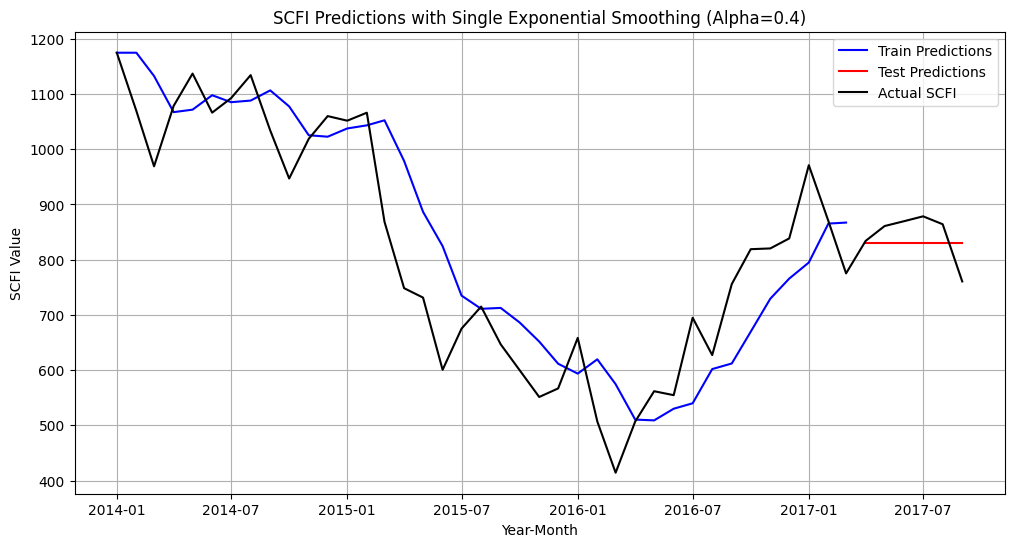

In [4]:
# Re-run the code to find the best alpha and fit the model
alpha_values = np.arange(0, 1.1, 0.1)
test_rmse = []1
    test_rmse.append(test_rmse_value)

# Find the alpha with the smallest test RMSE
best_alpha = alpha_values[np.argmin(test_rmse)]

# Fitting the best model
best_model = SimpleExpSmoothing(train_data).fit(smoothing_level=best_alpha, optimized=False)
train_predictions = best_model.fittedvalues
test_predictions = best_model.forecast(len(test_data))

# Preparing the plot
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_predictions, color='blue', label='Train Predictions')
plt.plot(test_data.index, test_predictions, color='red', label='Test Predictions')
plt.plot(data.index, data['SCFI_C'], color='black', label='Actual SCFI')

# Adding title and labels
plt.title(f'SCFI Predictions with Single Exponential Smoothing (Alpha={best_alpha})')
plt.xlabel('Year-Month')
plt.ylabel('SCFI Value')
plt.legend()
plt.grid(True)
plt.show()


**예측치**

In [5]:
test_predictions

2017-04-01    830.400132
2017-05-01    830.400132
2017-06-01    830.400132
2017-07-01    830.400132
2017-08-01    830.400132
2017-09-01    830.400132
Freq: MS, dtype: float64

2안) # 평활계수를 세분화 한 경우

In [6]:
import pandas as pd

# Load the data
file_path = '/content/sample_data/시계열분석_복합SCFI_2017.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
data.head()

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Converting 'YYYYMM' to datetime and setting it as index
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')
data.set_index('YYYYMM', inplace=True)

# Splitting the data into training and test sets (last 6 months as test data)
train_data = data[:-6]
test_data = data[-6:]

# Function to calculate RMSE
def calculate_rmse(test_data, predictions):
    return np.sqrt(mean_squared_error(test_data, predictions))

# Finding the optimal smoothing level alpha
alpha_values = np.linspace(0.01, 1, 100)
best_alpha = 0
best_rmse = float('inf')

for alpha in alpha_values:
    model = SimpleExpSmoothing(train_data).fit(smoothing_level=alpha, optimized=False)
    predictions = model.forecast(len(test_data))
    rmse = calculate_rmse(test_data, predictions)
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

best_alpha, best_rmse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

(0.04, 40.87290717317588)

# 도표 17-29. 단일지수평활법 평활계수 변경에 따른 RMSE

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

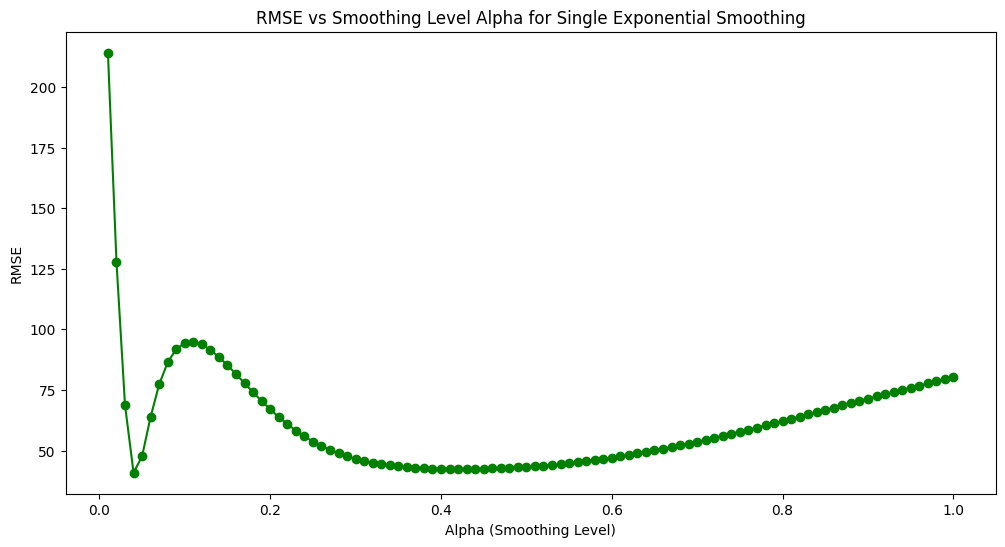

In [7]:
# Calculating RMSE for each alpha value again
rmse_values = []
for alpha in alpha_values:
    model = SimpleExpSmoothing(train_data).fit(smoothing_level=alpha, optimized=False)
    predictions = model.forecast(len(test_data))
    rmse = calculate_rmse(test_data, predictions)
    rmse_values.append(rmse)

# Plotting alpha values against RMSE
plt.figure(figsize=(12, 6))
plt.plot(alpha_values, rmse_values, color='green', marker='o')
plt.title('RMSE vs Smoothing Level Alpha for Single Exponential Smoothing')
plt.xlabel('Alpha (Smoothing Level)')
plt.ylabel('RMSE')
plt.show()


# 도표 17-30. np.linspace(0.01, 1, 100)로 생성한 평활계수

In [8]:
np.linspace(0.01, 1, 100)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [9]:
best_alpha

0.04

# 도표 17-31. 단일지수평활법 평활계수 중 0.04로 예측한 결과 그래프

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


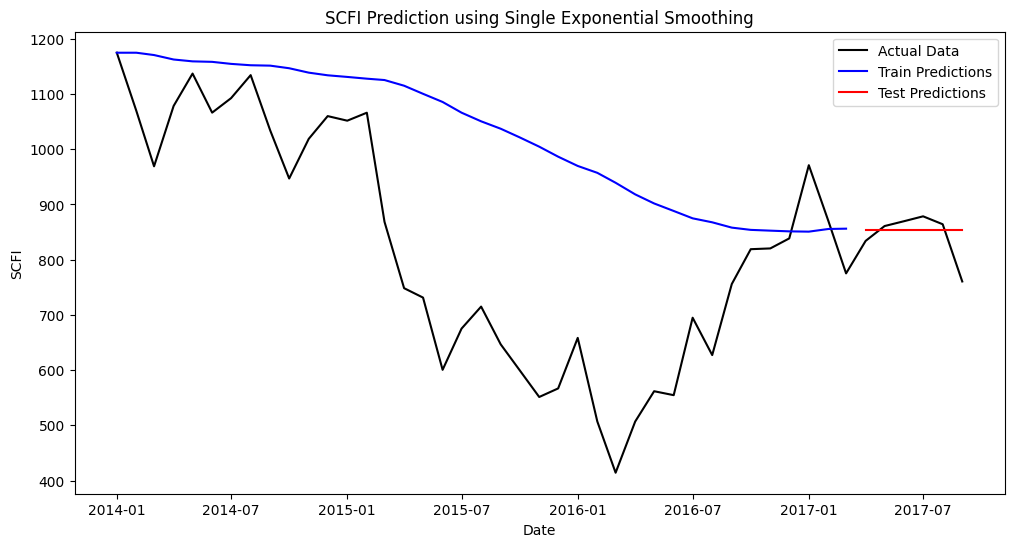

In [10]:
import matplotlib.pyplot as plt

# Fit the model with the best alpha
model = SimpleExpSmoothing(train_data).fit(smoothing_level=best_alpha, optimized=False)

# Predictions for the training data
train_predictions = model.fittedvalues

# Forecast for the test data
test_forecast = model.forecast(len(test_data))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['SCFI_C'], color='black', label='Actual Data')
plt.plot(train_data.index, train_predictions, color='blue', label='Train Predictions')
plt.plot(test_data.index, test_forecast, color='red', label='Test Predictions')
plt.title('SCFI Prediction using Single Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('SCFI')
plt.legend()
plt.show()

In [11]:
test_forecast

2017-04-01    852.943359
2017-05-01    852.943359
2017-06-01    852.943359
2017-07-01    852.943359
2017-08-01    852.943359
2017-09-01    852.943359
Freq: MS, dtype: float64